In [1]:
import numpy as np
import numpy.random as ndm
import torch
from torch import nn
import pandas as pd
#import matplotlib.pyplot as plt
from data_generator import generate_case_3
from g_deep import g_D
from CCP_estimation import CCP_est
from I_spline import I_S
from Least_FD import LFD
from g_dcp import g_DCP3
from Theta_estimate import Theta_est
from zeta_estimate import zeta_est
from iteration_dcp import Est_dcp2
from Least_FDcp import LFDCP

In [22]:
def set_seed(seed):
    np.random.seed(seed) 
    torch.manual_seed(seed) 

set_seed(12)
tau = 10
p = 3 
n = 2000
corr = 0.5 
n_layer = 3
n_node = 64
n_epoch = 200 #
Set_lr = np.array([2.8e-4, 3.2e-4, 4.2e-4]) #learning rate
n_lr = 5e-4
Theta = [-1, 2]
zeta = 2

#dim_x = X_test.shape[0]
u_value = np.array(np.linspace(0, tau, 50), dtype="float32") 
Lambda_true = np.sqrt(u_value) 
m = 10 
nodevec = np.array(np.linspace(0, tau, m+2), dtype="float32")

m0 = 4 
nodevec0 = np.array(np.linspace(0, 2, m0+2), dtype="float32")

node_D = np.array([35, 30, 30])   #deep
lr_D = np.array([4e-4, 4e-4, 4e-4])

In [3]:
test_data = generate_case_3(200, corr, Theta, zeta)
X_test = test_data['X']
Z_2_test = test_data['Z_2']
g_true = test_data['g_X']
h_true = test_data['h_X']
Res_true = test_data['g_X_C']

n= 2000 b= 0
n= 2000 b= 1
n= 2000 b= 2
n= 2000 b= 3
n= 2000 b= 4
n= 2000 b= 5
n= 2000 b= 6
n= 2000 b= 7
n= 2000 b= 8
n= 2000 b= 9
n= 2000 b= 10
n= 2000 b= 11
n= 2000 b= 12
n= 2000 b= 13
n= 2000 b= 14
n= 2000 b= 15
n= 2000 b= 16
n= 2000 b= 17
n= 2000 b= 18
n= 2000 b= 19
n= 2000 b= 20
n= 2000 b= 21
n= 2000 b= 22
n= 2000 b= 23
n= 2000 b= 24
n= 2000 b= 25
n= 2000 b= 26
n= 2000 b= 27
n= 2000 b= 28
n= 2000 b= 29
n= 2000 b= 30
n= 2000 b= 31
n= 2000 b= 32
n= 2000 b= 33
n= 2000 b= 34
n= 2000 b= 35
n= 2000 b= 36
n= 2000 b= 37
n= 2000 b= 38
n= 2000 b= 39
n= 2000 b= 40
n= 2000 b= 41
n= 2000 b= 42
n= 2000 b= 43
n= 2000 b= 44
n= 2000 b= 45
n= 2000 b= 46
n= 2000 b= 47
n= 2000 b= 48
n= 2000 b= 49
n= 2000 b= 50
n= 2000 b= 51
n= 2000 b= 52
n= 2000 b= 53
n= 2000 b= 54
n= 2000 b= 55
n= 2000 b= 56
n= 2000 b= 57
n= 2000 b= 58
n= 2000 b= 59
n= 2000 b= 60
n= 2000 b= 61
n= 2000 b= 62
n= 2000 b= 63
n= 2000 b= 64
n= 2000 b= 65
n= 2000 b= 66
n= 2000 b= 67
n= 2000 b= 68
n= 2000 b= 69
n= 2000 b= 70
n= 2000 b= 71
n=

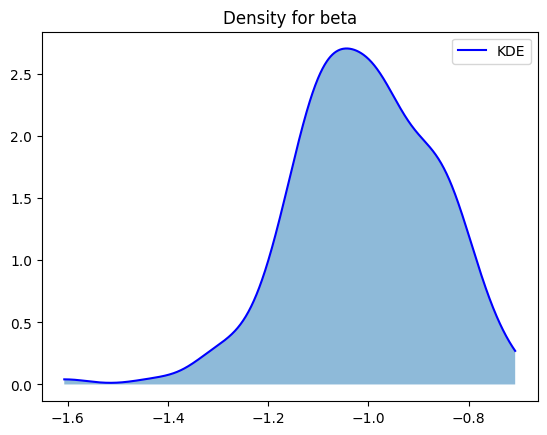

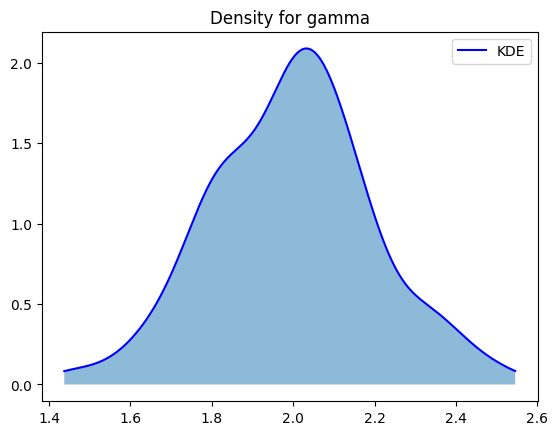

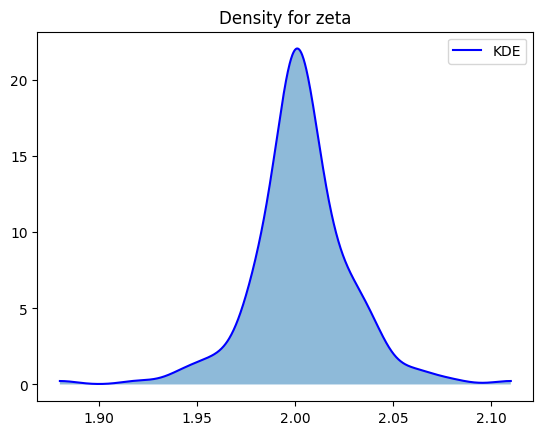

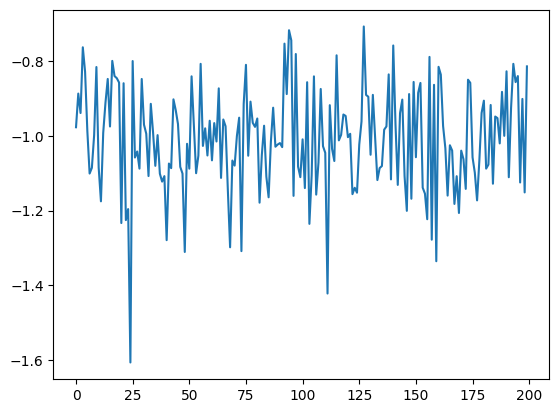

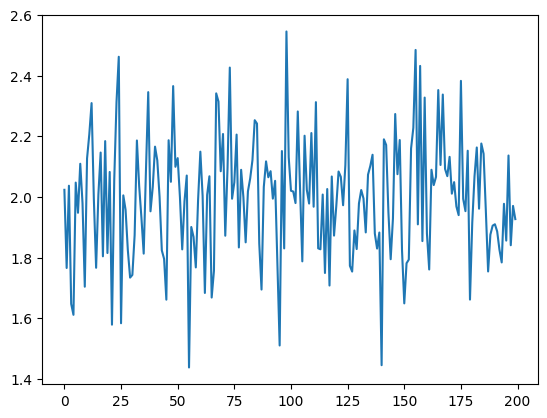

In [16]:
G_test_deep = []; H_test_deep = []; Res_test_deep = []
ThetaM = []; zetaM = []; C_deep = []
Info1_deep = []; Info2_deep = []; Re_G_deep = []; Re_H_deep = []; Re_Res_deep = []
for b in range(200):
    print('n=', n, 'b=', b )
    set_seed(1924 + b)
    c0 = np.array(0.1*np.ones(m+p), dtype="float32")
    Theta0 = np.array([0,1], dtype='float32')
    train_data = generate_case_3(2000, corr, Theta, zeta)  #g and h are deep function
    U_train = train_data['U']
    De_train = train_data['De']
    Z_train = train_data['Z']
    Z_2_train = train_data['Z_2']
    
    # Estimation
    result = Est_dcp2(train_data,X_test,Z_2_test,Theta,Theta0,n_layer,n_node,4e-4,200,nodevec,m,c0)

    # record the results
    Theta_res = result['Theta'] # vector to add row by row
    ThetaM.append(Theta_res)
    zeta_res = result['zeta'] # change point
    zetaM.append(zeta_res)
    C_res = result['C_index'] # baseline cumulative hazard
    C_deep.append(C_res)
    
    # test data to calculate Re and Sd_Re for g and h
    g_test_res = result['g_test'] 
    G_test_deep.append(g_test_res) # vector to add row by row
    h_test_res = result['h_test']
    H_test_deep.append(h_test_res) # vector to add row by row
    Res_test_res = result['Res_test']
    Res_test_deep.append(Res_test_res) # vector to add row by row
    Re_G_deep.append(np.sqrt(np.mean((g_test_res-np.mean(g_test_res)-g_true)**2)/np.mean(g_true**2))) #Re loss of g(x)
    Re_H_deep.append(np.sqrt(np.mean((h_test_res-np.mean(h_test_res)-h_true)**2)/np.mean(h_true**2)))
    Re_Res_deep.append(np.sqrt(np.mean((Res_test_res-np.mean(Res_test_res)-Res_true)**2)/np.mean(Res_true**2)))

    # Calculataion of the score and information
    Z1 = Z_train
    Z2 = Z_train*(Z_2_train>zeta_res)
    a_b1 = LFDCP(Z1,train_data,I_S(m,result['c'],U_train,nodevec),result['Res_train'],result['Theta'],\
             result['zeta'],n_layer=3,n_node=50,n_lr=2e-3,n_epoch=200)
    a_b2 = LFDCP(Z2,train_data,I_S(m,result['c'],U_train,nodevec),result['Res_train'],result['Theta'],\
             result['zeta'],n_layer=3,n_node=50,n_lr=6e-3,n_epoch=350)
    Z_train1 = np.vstack((Z_train, Z_train*(Z_2_train>zeta)))
    Z_train1 = Z_train1.T  
    h_v_deep = I_S(m,result['c'],U_train,nodevec) * np.exp(Z_train1@result['Theta'] + result['Res_train'])
    Q_y_deep = h_v_deep * (De_train * np.exp(-h_v_deep)/(1-np.exp(-h_v_deep)+1e-8) - (1-De_train))
    Info = np.zeros((2,2))
    Info[0,0] = np.mean(Q_y_deep**2 * (Z1-a_b1)**2)
    Info[1,1] = np.mean(Q_y_deep**2 * (Z2-a_b2)**2)
    Info[0,1] = np.mean(Q_y_deep**2 * (Z1-a_b1)*(Z2-a_b2))
    Info[1,0] = Info[0,1]
    Sigma = np.linalg.inv(Info)/n
    se1 = np.sqrt(Sigma[0,0])
    Info1_deep.append(se1)
    se2 = np.sqrt(Sigma[1,1])
    Info2_deep.append(se2)


#Error_g_dcp = np.mean(np.array(G_test_deep), axis=0) - g_true
#Error_h_dcp = np.mean(np.array(H_test_deep), axis=0) - h_true
#Error_Res_dcp = np.mean(np.array(Res_test_deep), axis=0) - Res_true
Theta_dcp = np.mean(np.array(ThetaM),axis=0)
zeta_dcp = np.mean(np.array(zetaM))
Sd_G_deep = (np.sqrt(np.mean((Re_G_deep-np.mean(Re_G_deep))**2)))
Sd_H_deep = (np.sqrt(np.mean((Re_H_deep-np.mean(Re_H_deep))**2)))
Sd_Res_deep = (np.sqrt(np.mean((Re_Res_deep-np.mean(Re_Res_deep))**2)))
ThetaM1 = np.array(ThetaM)[:,0]
ThetaM2 = np.array(ThetaM)[:,1]
Bias1_deep = (np.mean(np.array(ThetaM1))-Theta[0])
Sse1_deep = (np.sqrt(np.mean((np.array(ThetaM1)-np.mean(np.array(ThetaM1)))**2)))
Ese1_deep = (np.mean(np.array(Info1_deep)))
Cp1_deep = (np.mean((np.array(ThetaM1)-1.96*np.array(Info1_deep)<=Theta[0])*\
                       (Theta[0]<=np.array(ThetaM1)+1.96*np.array(Info1_deep))))
Bias2_deep = (np.mean(np.array(ThetaM2))-Theta[1])
Sse2_deep = (np.sqrt(np.mean((np.array(ThetaM2)-np.mean(np.array(ThetaM2)))**2)))
Ese2_deep = (np.mean(np.array(Info2_deep)))
Cp2_deep = (np.mean((np.array(ThetaM2)-1.96*np.array(Info2_deep)<=Theta[1])*\
                       (Theta[1]<=np.array(ThetaM2)+1.96*np.array(Info2_deep))))
#print(Error_g_dcp)
#print(Error_h_dcp)
#print(Error_Res_dcp)
print('Estimation for reg para and change point para:')
print('Theta: ', Theta_dcp)
print('zeta: ', zeta_dcp)
print('Estimation for Re and Sd of deep function:')
print('Re_g: ', np.mean(Re_G_deep))
print('Re_h: ', np.mean(Re_H_deep))
print('Re_total: ', np.mean(Re_Res_deep))
print('SdRe_g: ', Sd_G_deep)
print('SdRe_h: ', Sd_H_deep)
print('SdRe_total: ', Sd_Res_deep)
print('Inference for beta:')
print('Bias1:', Bias1_deep)
print('Sse1: ', Sse1_deep)
print('Ese1: ', Ese1_deep)
print('Cp1: ', Cp1_deep)
print('Inference for gamma:')
print('Bias2:', Bias2_deep)
print('Sse2: ', Sse2_deep)
print('Ese2: ', Ese2_deep)
print('Cp2: ', Cp2_deep)
#print(np.mean(Error_g_dcp))
#print(np.mean(Error_Res_dcp))
#print(np.mean(np.mean(np.array(G_test_deep), axis=0)))
#print(np.mean(g_true))

import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde
kde1 = gaussian_kde(ThetaM1)
xval = np.linspace(min(ThetaM1),max(ThetaM1),1000)
yval = kde1(xval)
plt.plot(xval,yval,label='KDE',color='blue')
plt.fill_between(xval,yval,alpha=0.5)
plt.title('Density for beta')
plt.legend()
plt.show()

kde2 = gaussian_kde(ThetaM2)
xval2 = np.linspace(min(ThetaM2),max(ThetaM2),1000)
yval2 = kde2(xval2)
plt.plot(xval2,yval2,label='KDE',color='blue')
plt.fill_between(xval2,yval2,alpha=0.5)
plt.title('Density for gamma')
plt.legend()
plt.show()

kde3 = gaussian_kde(zetaM)
xval3 = np.linspace(min(zetaM),max(zetaM),1000)
yval3 = kde3(xval3)
plt.plot(xval3,yval3,label='KDE',color='blue')
plt.fill_between(xval3,yval3,alpha=0.5)
plt.title('Density for zeta')
plt.legend()
plt.show()

plt.plot(ThetaM1)
plt.show()
plt.plot(ThetaM2)
plt.show()

0.5615
93.03725
1.6453209


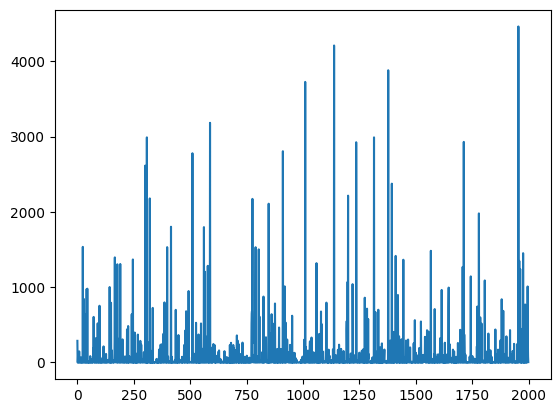

In [17]:
print(np.mean(De_train))
print(np.mean(train_data['T']))
Tl = train_data['T']
Tls = sorted(Tl)
print(Tls[1000])
plt.plot(Tl)
plt.show()

n= 2000 b= 0
n= 2000 b= 1
n= 2000 b= 2
n= 2000 b= 3
n= 2000 b= 4
n= 2000 b= 5
n= 2000 b= 6
n= 2000 b= 7
n= 2000 b= 8
n= 2000 b= 9
n= 2000 b= 10
n= 2000 b= 11
n= 2000 b= 12
n= 2000 b= 13
n= 2000 b= 14
n= 2000 b= 15
n= 2000 b= 16
n= 2000 b= 17
n= 2000 b= 18
n= 2000 b= 19
n= 2000 b= 20
n= 2000 b= 21
n= 2000 b= 22
n= 2000 b= 23
n= 2000 b= 24
n= 2000 b= 25
n= 2000 b= 26
n= 2000 b= 27
n= 2000 b= 28
n= 2000 b= 29
n= 2000 b= 30
n= 2000 b= 31
n= 2000 b= 32
n= 2000 b= 33
n= 2000 b= 34
n= 2000 b= 35
n= 2000 b= 36
n= 2000 b= 37
n= 2000 b= 38
n= 2000 b= 39
n= 2000 b= 40
n= 2000 b= 41
n= 2000 b= 42
n= 2000 b= 43
n= 2000 b= 44
n= 2000 b= 45
n= 2000 b= 46
n= 2000 b= 47
n= 2000 b= 48
n= 2000 b= 49
n= 2000 b= 50
n= 2000 b= 51
n= 2000 b= 52
n= 2000 b= 53
n= 2000 b= 54
n= 2000 b= 55
n= 2000 b= 56
n= 2000 b= 57
n= 2000 b= 58
n= 2000 b= 59
n= 2000 b= 60
n= 2000 b= 61
n= 2000 b= 62
n= 2000 b= 63
n= 2000 b= 64
n= 2000 b= 65
n= 2000 b= 66
n= 2000 b= 67
n= 2000 b= 68
n= 2000 b= 69
n= 2000 b= 70
n= 2000 b= 71
n=

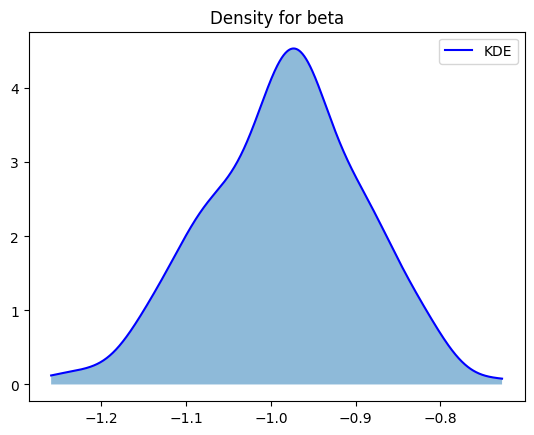

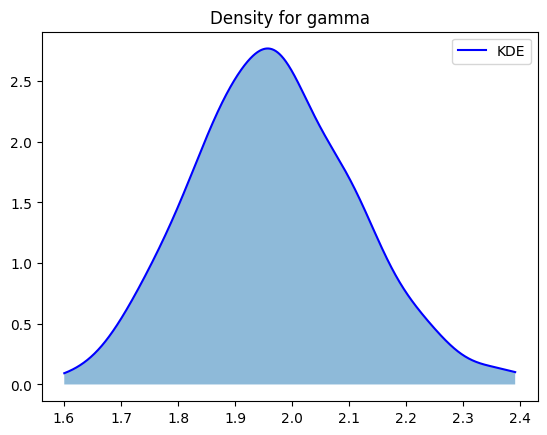

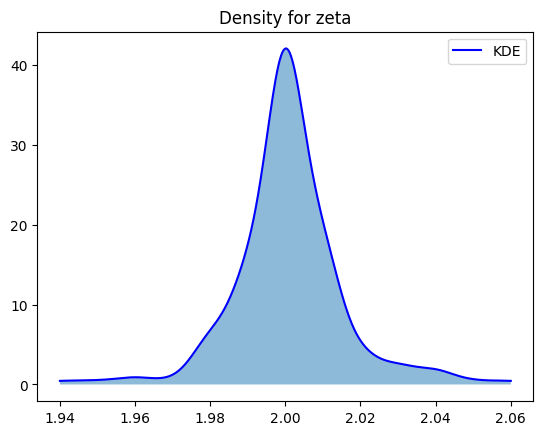

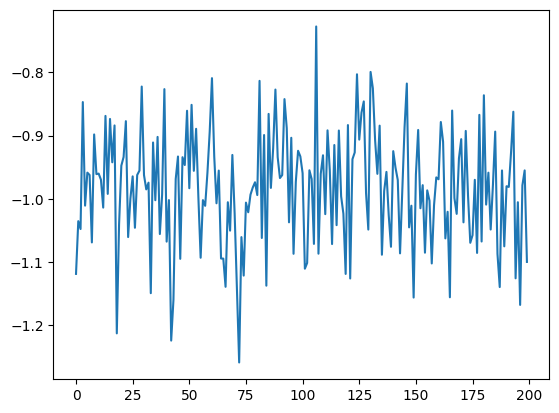

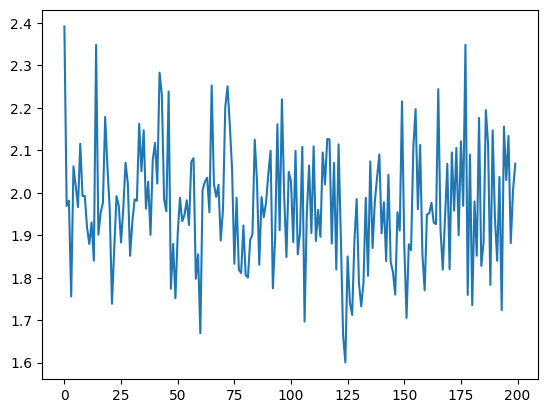

In [64]:
G_test_deep = []; H_test_deep = []; Res_test_deep = []
ThetaM = []; zetaM = []; C_deep = []
Info1_deep = []; Info2_deep = []; Re_G_deep = []; Re_H_deep = []; Re_Res_deep = []
for b in range(200):
    print('n=', n, 'b=', b )
    set_seed(1924 + b)
    c0 = np.array(0.1*np.ones(m+p), dtype="float32")
    Theta0 = np.array([0,1], dtype='float32')
    train_data = generate_case_3(4000, corr, Theta, zeta)  #g and h are deep function
    U_train = train_data['U']
    De_train = train_data['De']
    Z_train = train_data['Z']
    Z_2_train = train_data['Z_2']
    
    # Estimation
    result = Est_dcp2(train_data,X_test,Z_2_test,Theta,Theta0,3,64,4.3e-4,200,nodevec,m,c0)

    # record the results
    Theta_res = result['Theta'] # vector to add row by row
    ThetaM.append(Theta_res)
    zeta_res = result['zeta'] # change point
    zetaM.append(zeta_res)
    C_res = result['C_index'] # baseline cumulative hazard
    C_deep.append(C_res)
    
    # test data to calculate Re and Sd_Re for g and h
    g_test_res = result['g_test'] 
    G_test_deep.append(g_test_res) # vector to add row by row
    h_test_res = result['h_test']
    H_test_deep.append(h_test_res) # vector to add row by row
    Res_test_res = result['Res_test']
    Res_test_deep.append(Res_test_res) # vector to add row by row
    Re_G_deep.append(np.sqrt(np.mean((g_test_res-np.mean(g_test_res)-g_true)**2)/np.mean(g_true**2))) #Re loss of g(x)
    Re_H_deep.append(np.sqrt(np.mean((h_test_res-np.mean(h_test_res)-h_true)**2)/np.mean(h_true**2)))
    Re_Res_deep.append(np.sqrt(np.mean((Res_test_res-np.mean(Res_test_res)-Res_true)**2)/np.mean(Res_true**2)))

    # Calculataion of the score and information
    Z1 = Z_train
    Z2 = Z_train*(Z_2_train>zeta_res)
    a_b1 = LFDCP(Z1,train_data,I_S(m,result['c'],U_train,nodevec),result['Res_train'],result['Theta'],\
             result['zeta'],n_layer=3,n_node=50,n_lr=1e-4,n_epoch=100)
    a_b2 = LFDCP(Z2,train_data,I_S(m,result['c'],U_train,nodevec),result['Res_train'],result['Theta'],\
             result['zeta'],n_layer=3,n_node=50,n_lr=2e-3,n_epoch=200)
    Z_train1 = np.vstack((Z_train, Z_train*(Z_2_train>zeta)))
    Z_train1 = Z_train1.T  
    h_v_deep = I_S(m,result['c'],U_train,nodevec) * np.exp(Z_train1@result['Theta'] + result['Res_train'])
    Q_y_deep = h_v_deep * (De_train * np.exp(-h_v_deep)/(1-np.exp(-h_v_deep)+1e-8) - (1-De_train))
    Info = np.zeros((2,2))
    Info[0,0] = np.mean(Q_y_deep**2 * (Z1-a_b1)**2)
    Info[1,1] = np.mean(Q_y_deep**2 * (Z2-a_b2)**2)
    Info[0,1] = np.mean(Q_y_deep**2 * (Z1-a_b1)*(Z2-a_b2))
    Info[1,0] = Info[0,1]
    Sigma = np.linalg.inv(Info)/n
    se1 = np.sqrt(Sigma[0,0])
    Info1_deep.append(se1)
    se2 = np.sqrt(Sigma[1,1])
    Info2_deep.append(se2)


#Error_g_dcp = np.mean(np.array(G_test_deep), axis=0) - g_true
#Error_h_dcp = np.mean(np.array(H_test_deep), axis=0) - h_true
#Error_Res_dcp = np.mean(np.array(Res_test_deep), axis=0) - Res_true
Theta_dcp = np.mean(np.array(ThetaM),axis=0)
zeta_dcp = np.mean(np.array(zetaM))
Sd_G_deep = (np.sqrt(np.mean((Re_G_deep-np.mean(Re_G_deep))**2)))
Sd_H_deep = (np.sqrt(np.mean((Re_H_deep-np.mean(Re_H_deep))**2)))
Sd_Res_deep = (np.sqrt(np.mean((Re_Res_deep-np.mean(Re_Res_deep))**2)))
ThetaM1 = np.array(ThetaM)[:,0]
ThetaM2 = np.array(ThetaM)[:,1]
Bias1_deep = (np.mean(np.array(ThetaM1))-Theta[0])
Sse1_deep = (np.sqrt(np.mean((np.array(ThetaM1)-np.mean(np.array(ThetaM1)))**2)))
Ese1_deep = (np.mean(np.array(Info1_deep)))
Cp1_deep = (np.mean((np.array(ThetaM1)-1.96*np.array(Info1_deep)<=Theta[0])*\
                       (Theta[0]<=np.array(ThetaM1)+1.96*np.array(Info1_deep))))
Bias2_deep = (np.mean(np.array(ThetaM2))-Theta[1])
Sse2_deep = (np.sqrt(np.mean((np.array(ThetaM2)-np.mean(np.array(ThetaM2)))**2)))
Ese2_deep = (np.mean(np.array(Info2_deep)))
Cp2_deep = (np.mean((np.array(ThetaM2)-1.96*np.array(Info2_deep)<=Theta[1])*\
                       (Theta[1]<=np.array(ThetaM2)+1.96*np.array(Info2_deep))))
#print(Error_g_dcp)
#print(Error_h_dcp)
#print(Error_Res_dcp)
print('Estimation for reg para and change point para:')
print('Theta: ', Theta_dcp)
print('zeta: ', zeta_dcp)
print('Estimation for Re and Sd of deep function:')
print('Re_g: ', np.mean(Re_G_deep))
print('Re_h: ', np.mean(Re_H_deep))
print('Re_total: ', np.mean(Re_Res_deep))
print('SdRe_g: ', Sd_G_deep)
print('SdRe_h: ', Sd_H_deep)
print('SdRe_total: ', Sd_Res_deep)
print('Inference for beta:')
print('Bias1:', Bias1_deep)
print('Sse1: ', Sse1_deep)
print('Ese1: ', Ese1_deep)
print('Cp1: ', Cp1_deep)
print('Inference for gamma:')
print('Bias2:', Bias2_deep)
print('Sse2: ', Sse2_deep)
print('Ese2: ', Ese2_deep)
print('Cp2: ', Cp2_deep)
#print(np.mean(Error_g_dcp))
#print(np.mean(Error_Res_dcp))
#print(np.mean(np.mean(np.array(G_test_deep), axis=0)))
#print(np.mean(g_true))

import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde
kde1 = gaussian_kde(ThetaM1)
xval = np.linspace(min(ThetaM1),max(ThetaM1),1000)
yval = kde1(xval)
plt.plot(xval,yval,label='KDE',color='blue')
plt.fill_between(xval,yval,alpha=0.5)
plt.title('Density for beta')
plt.legend()
plt.show()

kde2 = gaussian_kde(ThetaM2)
xval2 = np.linspace(min(ThetaM2),max(ThetaM2),1000)
yval2 = kde2(xval2)
plt.plot(xval2,yval2,label='KDE',color='blue')
plt.fill_between(xval2,yval2,alpha=0.5)
plt.title('Density for gamma')
plt.legend()
plt.show()

kde3 = gaussian_kde(zetaM)
xval3 = np.linspace(min(zetaM),max(zetaM),1000)
yval3 = kde3(xval3)
plt.plot(xval3,yval3,label='KDE',color='blue')
plt.fill_between(xval3,yval3,alpha=0.5)
plt.title('Density for zeta')
plt.legend()
plt.show()

plt.plot(ThetaM1)
plt.show()
plt.plot(ThetaM2)
plt.show()

0.532
92.64253
2.686783


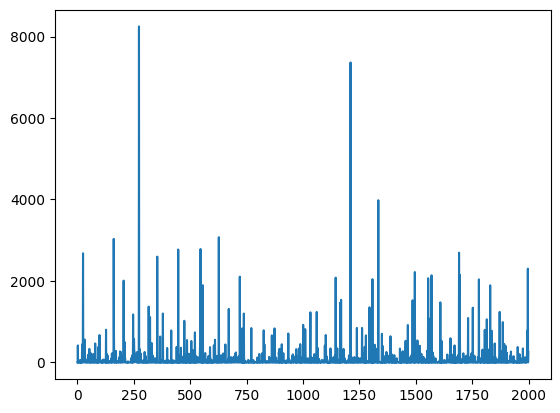

In [5]:
print(np.mean(De_train))
print(np.mean(train_data['T']))
Tl = train_data['T']
Tls = sorted(Tl)
print(Tls[1000])
plt.plot(Tl)
plt.show()

n= 2000 b= 0
n= 2000 b= 1
n= 2000 b= 2
n= 2000 b= 3
n= 2000 b= 4
n= 2000 b= 5
n= 2000 b= 6
n= 2000 b= 7
n= 2000 b= 8
n= 2000 b= 9
n= 2000 b= 10
n= 2000 b= 11
n= 2000 b= 12
n= 2000 b= 13
n= 2000 b= 14
n= 2000 b= 15
n= 2000 b= 16
n= 2000 b= 17
n= 2000 b= 18
n= 2000 b= 19
n= 2000 b= 20
n= 2000 b= 21
n= 2000 b= 22
n= 2000 b= 23
n= 2000 b= 24
n= 2000 b= 25
n= 2000 b= 26
n= 2000 b= 27
n= 2000 b= 28
n= 2000 b= 29
n= 2000 b= 30
n= 2000 b= 31
n= 2000 b= 32
n= 2000 b= 33
n= 2000 b= 34
n= 2000 b= 35
n= 2000 b= 36
n= 2000 b= 37
n= 2000 b= 38
n= 2000 b= 39
n= 2000 b= 40
n= 2000 b= 41
n= 2000 b= 42
n= 2000 b= 43
n= 2000 b= 44
n= 2000 b= 45
n= 2000 b= 46
n= 2000 b= 47
n= 2000 b= 48
n= 2000 b= 49
n= 2000 b= 50
n= 2000 b= 51
n= 2000 b= 52
n= 2000 b= 53
n= 2000 b= 54
n= 2000 b= 55
n= 2000 b= 56
n= 2000 b= 57
n= 2000 b= 58
n= 2000 b= 59
n= 2000 b= 60
n= 2000 b= 61
n= 2000 b= 62
n= 2000 b= 63
n= 2000 b= 64
n= 2000 b= 65
n= 2000 b= 66
n= 2000 b= 67
n= 2000 b= 68
n= 2000 b= 69
n= 2000 b= 70
n= 2000 b= 71
n=

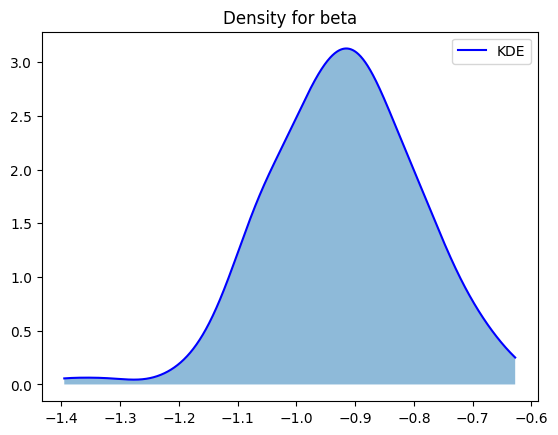

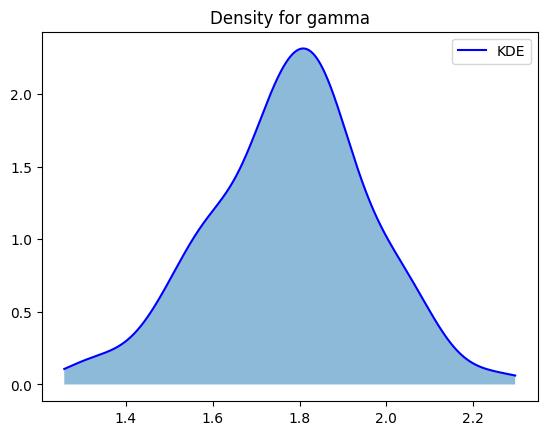

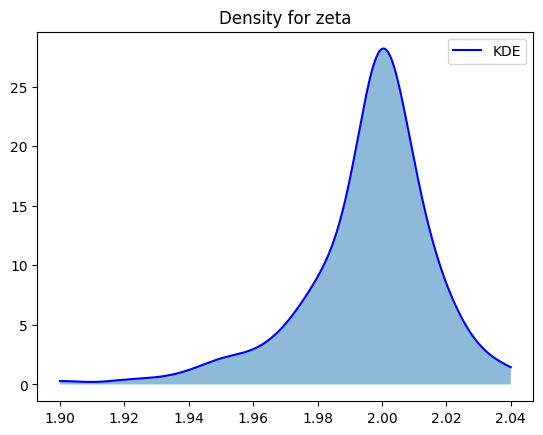

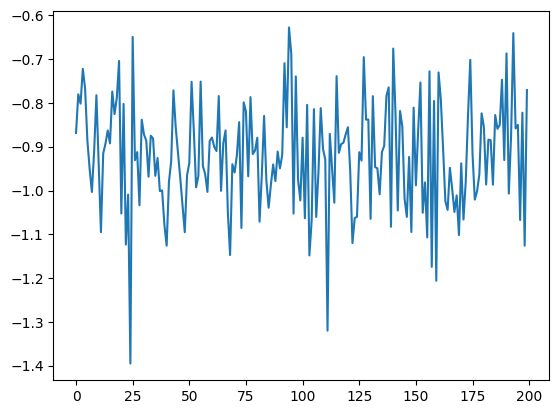

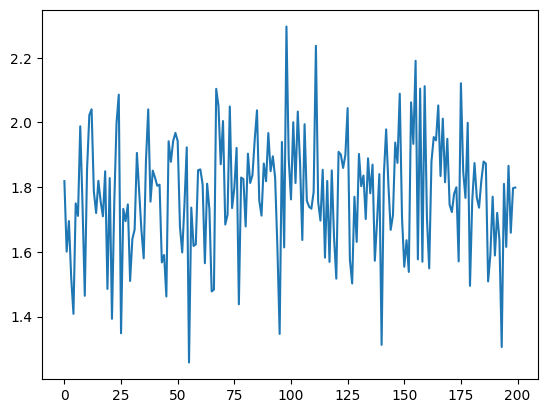

In [4]:
from g_Lcp import g_LCP
from iteration_lcp import Est_Lcp
from Least_FDLcp import LFDLCP
Theta = [-1, 2]
G_test_linear = []
H_test_linear = []
Res_test_linear = []
ThetaL = []
zetaL = []
Re_G_linear = []
Re_H_linear = []
Re_Res_linear = []
Info1_linear = []
Info2_linear = []
for b in range(200):
    print('n=', n, 'b=', b)
    set_seed(1924 + b)
    c0 = np.array(0.1*np.ones(m+p), dtype="float32")
    Theta0 = np.array([0,1], dtype='float32')
    train_data = generate_case_3(2000, 0.5, Theta, zeta)
    result = Est_Lcp(train_data,X_test,Z_2_test,Theta,Theta0,nodevec,m,c0)
    Theta_res = result['Theta'] # vector to add row by row
    ThetaL.append(Theta_res)
    zeta_res = result['zeta']
    zetaL.append(zeta_res)
    #C_res = result['C_index']
    g_test_res = result['g_test']
    G_test_linear.append(g_test_res) # vector to add row by row
    h_test_res = result['h_test']
    H_test_linear.append(h_test_res) # vector to add row by row
    Res_test_res = result['Res_test']
    Res_test_linear.append(Res_test_res) # vector to add row by row

    Re_G_linear.append(np.sqrt(np.mean((g_test_res-np.mean(g_test_res)-g_true)**2)/np.mean(g_true**2))) #loss of g(x)
    Re_H_linear.append(np.sqrt(np.mean((h_test_res-np.mean(h_test_res)-h_true)**2)/np.mean(h_true**2)))
    Re_Res_linear.append(np.sqrt(np.mean((Res_test_res-np.mean(Res_test_res)-Res_true)**2)/np.mean(Res_true**2)))

    Res_train = result['Res_train']
    U_train = train_data['U']
    Lambda_U_res = I_S(m,result['c'],U_train,nodevec)
    ab = LFDLCP(train_data,Lambda_U_res,Res_train,Theta_res,zeta_res)
    se1 = ab['se1']
    Info1_linear.append(se1)
    se2 = ab['se2']
    Info2_linear.append(se2)
     
Error_g_lcp = np.mean(np.array(G_test_linear), axis=0) - g_true
Error_h_lcp = np.mean(np.array(H_test_linear), axis=0) - h_true
Error_Res_lcp = np.mean(np.array(Res_test_linear), axis=0) - Res_true
Theta_lcp = np.mean(np.array(ThetaL),axis=0)
zeta_lcp = np.mean(np.array(zetaL))
Sd_G_linear = (np.sqrt(np.mean((Re_G_linear-np.mean(Re_G_linear))**2)))
Sd_H_linear = (np.sqrt(np.mean((Re_H_linear-np.mean(Re_H_linear))**2)))
Sd_Res_linear = (np.sqrt(np.mean((Re_Res_linear-np.mean(Re_Res_linear))**2)))
ThetaL1 = np.array(ThetaL)[:,0]
ThetaL2 = np.array(ThetaL)[:,1]
Bias1_linear = (np.mean(np.array(ThetaL1))-Theta[0])
Bias2_linear = (np.mean(np.array(ThetaL2))-Theta[1])
Sse1_linear = (np.sqrt(np.mean((np.array(ThetaL1)-np.mean(np.array(ThetaL1)))**2)))
Sse2_linear = (np.sqrt(np.mean((np.array(ThetaL2)-np.mean(np.array(ThetaL2)))**2)))
Ese1_linear = (np.mean(np.array(Info1_linear)))
Cp1_linear = (np.mean((np.array(ThetaL1)-1.96*np.array(Info1_linear)<=Theta[0])*\
                       (Theta[0]<=np.array(ThetaL1)+1.96*np.array(Info1_linear))))
Ese2_linear = (np.mean(np.array(Info2_linear)))
Cp2_linear = (np.mean((np.array(ThetaL2)-1.96*np.array(Info2_linear)<=Theta[1])*\
                       (Theta[1]<=np.array(ThetaL2)+1.96*np.array(Info2_linear))))
print('Estimation for reg para and change point para:')
print('Theta: ', Theta_lcp)
print('zeta: ', zeta_lcp)
print('Estimation for Re and Sd of deep function:')
print('Re_g: ', np.mean(Re_G_linear))
print('Re_h: ', np.mean(Re_H_linear))
print('Re_total: ', np.mean(Re_Res_linear))
print('SdRe_g: ', Sd_G_linear)
print('SdRe_h: ', Sd_H_linear)
print('SdRe_total: ', Sd_Res_linear)
print('Inference for beta:')
print('Bias1:', Bias1_linear)
print('Sse1: ', Sse1_linear)
print('Ese1: ', Ese1_linear)
print('CP1: ', Cp1_linear)
print('Inference for gamma:')
print('Bias2:', Bias2_linear)
print('Sse2: ', Sse2_linear)
print('Ese2: ', Ese2_linear)
print('CP2: ', Cp2_linear)
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde
kde1 = gaussian_kde(ThetaL1)
xval = np.linspace(min(ThetaL1),max(ThetaL1),1000)
yval = kde1(xval)
plt.plot(xval,yval,label='KDE',color='blue')
plt.fill_between(xval,yval,alpha=0.5)
plt.title('Density for beta')
plt.legend()
plt.show()

kde2 = gaussian_kde(ThetaL2)
xval2 = np.linspace(min(ThetaL2),max(ThetaL2),1000)
yval2 = kde2(xval2)
plt.plot(xval2,yval2,label='KDE',color='blue')
plt.fill_between(xval2,yval2,alpha=0.5)
plt.title('Density for gamma')
plt.legend()
plt.show()

kde3 = gaussian_kde(zetaL)
xval3 = np.linspace(min(zetaL),max(zetaL),1000)
yval3 = kde3(xval3)
plt.plot(xval3,yval3,label='KDE',color='blue')
plt.fill_between(xval3,yval3,alpha=0.5)
plt.title('Density for zeta')
plt.legend()
plt.show()

plt.plot(ThetaL1)
plt.show()
plt.plot(ThetaL2)
plt.show()

n= 2000 b= 0
n= 2000 b= 1
n= 2000 b= 2
n= 2000 b= 3
n= 2000 b= 4
n= 2000 b= 5
n= 2000 b= 6
n= 2000 b= 7
n= 2000 b= 8
n= 2000 b= 9
n= 2000 b= 10
n= 2000 b= 11
n= 2000 b= 12
n= 2000 b= 13
n= 2000 b= 14
n= 2000 b= 15
n= 2000 b= 16
n= 2000 b= 17
n= 2000 b= 18
n= 2000 b= 19
n= 2000 b= 20
n= 2000 b= 21
n= 2000 b= 22
n= 2000 b= 23
n= 2000 b= 24
n= 2000 b= 25
n= 2000 b= 26
n= 2000 b= 27
n= 2000 b= 28
n= 2000 b= 29
n= 2000 b= 30
n= 2000 b= 31
n= 2000 b= 32
n= 2000 b= 33
n= 2000 b= 34
n= 2000 b= 35
n= 2000 b= 36
n= 2000 b= 37
n= 2000 b= 38
n= 2000 b= 39
n= 2000 b= 40
n= 2000 b= 41
n= 2000 b= 42
n= 2000 b= 43
n= 2000 b= 44
n= 2000 b= 45
n= 2000 b= 46
n= 2000 b= 47
n= 2000 b= 48
n= 2000 b= 49
n= 2000 b= 50
n= 2000 b= 51
n= 2000 b= 52
n= 2000 b= 53
n= 2000 b= 54
n= 2000 b= 55
n= 2000 b= 56
n= 2000 b= 57
n= 2000 b= 58
n= 2000 b= 59
n= 2000 b= 60
n= 2000 b= 61
n= 2000 b= 62
n= 2000 b= 63
n= 2000 b= 64
n= 2000 b= 65
n= 2000 b= 66
n= 2000 b= 67
n= 2000 b= 68
n= 2000 b= 69
n= 2000 b= 70
n= 2000 b= 71
n=

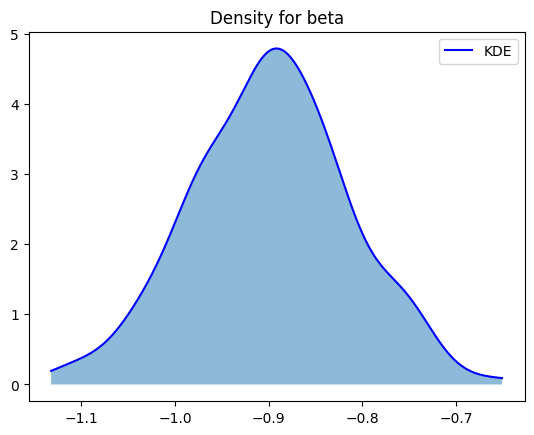

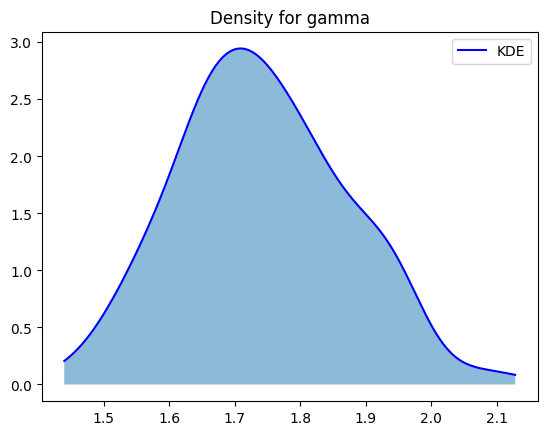

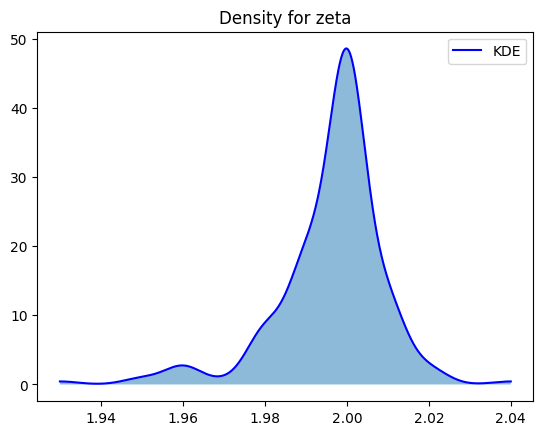

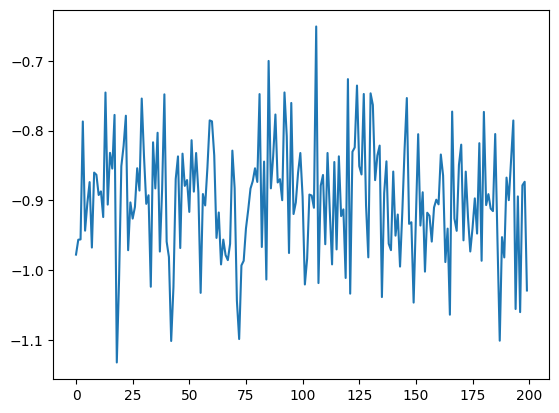

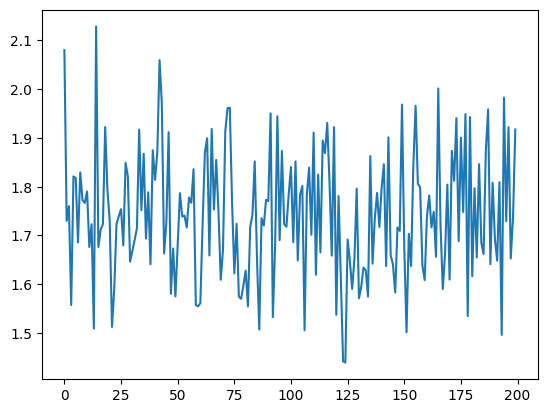

In [5]:
from g_Lcp import g_LCP
from iteration_lcp import Est_Lcp
from Least_FDLcp import LFDLCP
Theta = [-1, 2]
G_test_linear = []
H_test_linear = []
Res_test_linear = []
ThetaL = []
zetaL = []
Re_G_linear = []
Re_H_linear = []
Re_Res_linear = []
Info1_linear = []
Info2_linear = []
for b in range(200):
    print('n=', n, 'b=', b)
    set_seed(1924 + b)
    c0 = np.array(0.1*np.ones(m+p), dtype="float32")
    Theta0 = np.array([0,1], dtype='float32')
    train_data = generate_case_3(4000, 0.5, Theta, zeta)
    result = Est_Lcp(train_data,X_test,Z_2_test,Theta,Theta0,nodevec,m,c0)
    Theta_res = result['Theta'] # vector to add row by row
    ThetaL.append(Theta_res)
    zeta_res = result['zeta']
    zetaL.append(zeta_res)
    #C_res = result['C_index']
    g_test_res = result['g_test']
    G_test_linear.append(g_test_res) # vector to add row by row
    h_test_res = result['h_test']
    H_test_linear.append(h_test_res) # vector to add row by row
    Res_test_res = result['Res_test']
    Res_test_linear.append(Res_test_res) # vector to add row by row

    Re_G_linear.append(np.sqrt(np.mean((g_test_res-np.mean(g_test_res)-g_true)**2)/np.mean(g_true**2))) #loss of g(x)
    Re_H_linear.append(np.sqrt(np.mean((h_test_res-np.mean(h_test_res)-h_true)**2)/np.mean(h_true**2)))
    Re_Res_linear.append(np.sqrt(np.mean((Res_test_res-np.mean(Res_test_res)-Res_true)**2)/np.mean(Res_true**2)))

    Res_train = result['Res_train']
    U_train = train_data['U']
    Lambda_U_res = I_S(m,result['c'],U_train,nodevec)
    ab = LFDLCP(train_data,Lambda_U_res,Res_train,Theta_res,zeta_res)
    se1 = ab['se1']
    Info1_linear.append(se1)
    se2 = ab['se2']
    Info2_linear.append(se2)
     
Error_g_lcp = np.mean(np.array(G_test_linear), axis=0) - g_true
Error_h_lcp = np.mean(np.array(H_test_linear), axis=0) - h_true
Error_Res_lcp = np.mean(np.array(Res_test_linear), axis=0) - Res_true
Theta_lcp = np.mean(np.array(ThetaL),axis=0)
zeta_lcp = np.mean(np.array(zetaL))
Sd_G_linear = (np.sqrt(np.mean((Re_G_linear-np.mean(Re_G_linear))**2)))
Sd_H_linear = (np.sqrt(np.mean((Re_H_linear-np.mean(Re_H_linear))**2)))
Sd_Res_linear = (np.sqrt(np.mean((Re_Res_linear-np.mean(Re_Res_linear))**2)))
ThetaL1 = np.array(ThetaL)[:,0]
ThetaL2 = np.array(ThetaL)[:,1]
Bias1_linear = (np.mean(np.array(ThetaL1))-Theta[0])
Bias2_linear = (np.mean(np.array(ThetaL2))-Theta[1])
Sse1_linear = (np.sqrt(np.mean((np.array(ThetaL1)-np.mean(np.array(ThetaL1)))**2)))
Sse2_linear = (np.sqrt(np.mean((np.array(ThetaL2)-np.mean(np.array(ThetaL2)))**2)))
Ese1_linear = (np.mean(np.array(Info1_linear)))
Cp1_linear = (np.mean((np.array(ThetaL1)-1.96*np.array(Info1_linear)<=Theta[0])*\
                       (Theta[0]<=np.array(ThetaL1)+1.96*np.array(Info1_linear))))
Ese2_linear = (np.mean(np.array(Info2_linear)))
Cp2_linear = (np.mean((np.array(ThetaL2)-1.96*np.array(Info2_linear)<=Theta[1])*\
                       (Theta[1]<=np.array(ThetaL2)+1.96*np.array(Info2_linear))))
print('Estimation for reg para and change point para:')
print('Theta: ', Theta_lcp)
print('zeta: ', zeta_lcp)
print('Estimation for Re and Sd of deep function:')
print('Re_g: ', np.mean(Re_G_linear))
print('Re_h: ', np.mean(Re_H_linear))
print('Re_total: ', np.mean(Re_Res_linear))
print('SdRe_g: ', Sd_G_linear)
print('SdRe_h: ', Sd_H_linear)
print('SdRe_total: ', Sd_Res_linear)
print('Inference for beta:')
print('Bias1:', Bias1_linear)
print('Sse1: ', Sse1_linear)
print('Ese1: ', Ese1_linear)
print('CP1: ', Cp1_linear)
print('Inference for gamma:')
print('Bias2:', Bias2_linear)
print('Sse2: ', Sse2_linear)
print('Ese2: ', Ese2_linear)
print('CP2: ', Cp2_linear)
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde
kde1 = gaussian_kde(ThetaL1)
xval = np.linspace(min(ThetaL1),max(ThetaL1),1000)
yval = kde1(xval)
plt.plot(xval,yval,label='KDE',color='blue')
plt.fill_between(xval,yval,alpha=0.5)
plt.title('Density for beta')
plt.legend()
plt.show()

kde2 = gaussian_kde(ThetaL2)
xval2 = np.linspace(min(ThetaL2),max(ThetaL2),1000)
yval2 = kde2(xval2)
plt.plot(xval2,yval2,label='KDE',color='blue')
plt.fill_between(xval2,yval2,alpha=0.5)
plt.title('Density for gamma')
plt.legend()
plt.show()

kde3 = gaussian_kde(zetaL)
xval3 = np.linspace(min(zetaL),max(zetaL),1000)
yval3 = kde3(xval3)
plt.plot(xval3,yval3,label='KDE',color='blue')
plt.fill_between(xval3,yval3,alpha=0.5)
plt.title('Density for zeta')
plt.legend()
plt.show()

plt.plot(ThetaL1)
plt.show()
plt.plot(ThetaL2)
plt.show()

In [ ]:
from C_estimation import C_est
from iteration_deep import Est_deep
#set_seed(12)
tau = 10
p = 3 
n = 2000
corr = 0.5 
n_layer = 3
n_node = 64
n_epoch = 200 #
Theta = [0, -1]
u_value = np.array(np.linspace(0, tau, 50), dtype="float32") 
Lambda_true = np.sqrt(u_value) 
m = 10 
nodevec = np.array(np.linspace(0, tau, m+2), dtype="float32")

set_seed(145)
c0 = np.array(0.1*np.ones(m+p), dtype="float32") 
Beta = -1
Beta0 = np.array(0, dtype='float32')
zeta = 1.8
train_data = generate_case_3(n, corr, Theta, zeta)
Z_train = train_data['Z']
Z_2_train = train_data['Z_2']
U_train = train_data['U']
De_train = train_data['De']
g_train = train_data['g_X']
X_train = train_data['X']
Z_2_train = ndm.choice(Z_2_train, size = n, replace=False)
test_data = generate_case_3(200, corr, Theta, zeta)
X_test = test_data['X'] 
Est_hat = Est_deep(train_data=train_data,X_test=X_test,Beta=Beta,Beta0=Beta0,n_layer=3,\
                   n_node=64,n_lr=4.5e-4,n_epoch=200,nodevec=nodevec,m=m,c0=c0)

Betat = Est_hat['Beta']
Lambdat = I_S(m,Est_hat['c'],U_train,nodevec)
gt = Est_hat['g_train']
Lam = Lambdat * np.exp(Z_train * Betat + gt)
#print(-De_train * np.log(1 - np.exp(-Lam) + 1e-5) + (1 - De_train) * Lam * (Z_2_train>zeta))
Qy = np.mean((-De_train * np.log(1 - np.exp(-Lam) + 1e-5) + (1 - De_train) * Lam )* (Z_2_train>zeta)) #indcator
p = X_train.shape[1]
X_train1 = X_train.T

func = (X_train1<ndm.uniform(0,2,size = (p,n)))[1,:]
print(func)
ZX = np.vstack((Z_train,func))
#ZX = Z_train
ind = Z_2_train>zeta
for a in range(p):
    ind = np.vstack((ind,Z_2_train>zeta))
UZX = ZX*Qy
ZXD = ZX
SigmaZX = np.linalg.inv(Qy**2*ZXD@ZXD.T+1e-8*np.eye(2))
SUPstat = np.trace(UZX.T@SigmaZX@UZX)
print(Qy)
print(SUPstat)
#print(ind)
print(Betat)
#print(zeta)

NameError: name 'X_test' is not defined

[0.87536019]
0.0046842684114122195


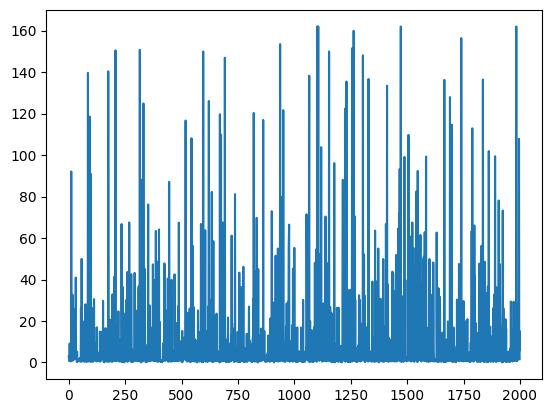

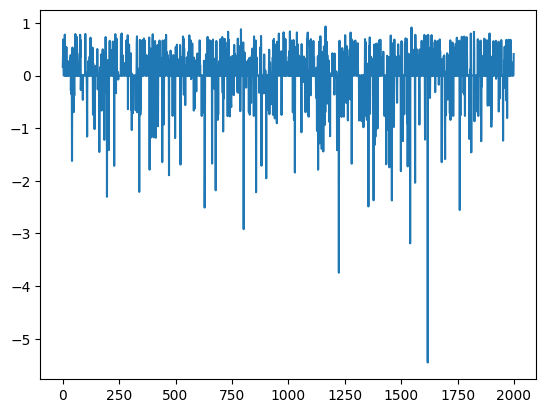

In [36]:
from SUPtest import SUPstat
from iteration_deep import Est_deep
from data_generator import generate_case_33
def set_seed(seed):
    np.random.seed(seed) 
    torch.manual_seed(seed) 

set_seed(1146)
n = 2000
corr = 0.5 
n_lr = 4e-4
n_layer = 3
n_node = 64
n_epoch = 200 #
u_value = np.array(np.linspace(0, tau, 50), dtype="float32") 
Lambda_true = np.sqrt(u_value) 
m = 10 
nodevec = np.array(np.linspace(0, tau, m+2), dtype="float32")

Theta = [1, 0]
Beta = -1
c0 = np.array(0.1*np.ones(m+p), dtype="float32") 
Beta0 = np.array(0, dtype='float32')
u_value = np.array(np.linspace(0, tau, 50), dtype="float32") 
Lambda_true = np.sqrt(u_value) 
nodevec = np.array(np.linspace(0, tau, m+2), dtype="float32")
m0 = 4 
nodevec0 = np.array(np.linspace(0, 2, m0+2), dtype="float32")
zeta = 2
train_data = generate_case_33(n, corr, Theta, zeta, ishx= True)
test_data = generate_case_33(2000, corr, Theta, zeta, ishx= True)
Z_train = train_data['Z']
U_train = train_data['U']
De_train = train_data['De']
g_train = train_data['g_X']
X_train = train_data['X']
X_test = test_data['X']
Z_2_train = train_data['Z_2']

#Z_2_train = ndm.choice(Z_2_train, size = n, replace=False)
#zeta1 = 2
#SUPstat(train_data,test_data,Z_2_train,n_lr=4e-4)
Est_hat = Est_deep(train_data=train_data,X_test=X_test,Beta=Beta,Beta0=Beta0,n_layer=n_layer,\
                    n_node=n_node,n_lr=n_lr,n_epoch=n_epoch,nodevec=nodevec,m=m,c0=c0)
Z_test = test_data['Z']
U_test = test_data['U']
De_test = test_data['De']
g_test = test_data['g_X']
Z_2_test = test_data['Z_2']
Betat = Est_hat['Beta']
Lambdat = I_S(m,Est_hat['c'],U_test,nodevec)
gt = Est_hat['g_test']
Lam = Lambdat * np.exp(Z_test * Betat + gt) 
St = np.exp(-Lam)
Qy = ((De_test * (St/(1-St)) - (1 - De_test)) * Lam )*(Z_2_test>2)
import matplotlib.pyplot as plt
print(Betat)
print(np.mean(Qy))
plt.plot(Lam)
plt.show()
plt.plot(Qy)
plt.show()


In [3]:
from SUPtest import SUPstat
from iteration_deep import Est_deep
from data_generator import generate_case_33
from SUPtest import SUPstat1
def set_seed(seed):
    np.random.seed(seed) 
    torch.manual_seed(seed) 

set_seed(1146)
n = 2000
corr = 0.5 
Theta = [0, 0]
zeta = 2
train_data = generate_case_33(n, corr, Theta, zeta, ishx= True)
test_data = generate_case_33(2000, corr, Theta, zeta, ishx= True)
#Z_2_train = train_data['Z_2']
#Z_2_train = ndm.choice(Z_2_train, size = n, replace=False)
Z_2_test= test_data['Z_2']
#Z_2_test = ndm.choice(Z_2_test, size = n, replace=False)
SUPstat1(train_data,test_data,Z_2_test,n_lr=4e-4)

2.5409800151604234

In [30]:
from SUPtest import SUPstat
from iteration_deep import Est_deep
from data_generator import generate_case_33
def set_seed(seed):
    np.random.seed(seed) 
    torch.manual_seed(seed) 

set_seed(1146)
n = 2000
corr = 0.5 
Theta = [0, 0]
zeta = 2
train_data = generate_case_33(n, corr, Theta, zeta, ishx= True)
test_data = generate_case_33(200, corr, Theta, zeta, ishx= True)
Z_2_train = train_data['Z_2']
Z_2_train = ndm.choice(Z_2_train, size = n, replace=False)
SUPstat(train_data,test_data,Z_2_train,n_lr=4e-4)

1.363525204026381

In [2]:
from SUPtest import SUPstat
from SUPtest import SUPtest
from iteration_deep import Est_deep
from data_generator import generate_case_33
def set_seed(seed):
    np.random.seed(seed) 
    torch.manual_seed(seed) 

set_seed(1146)
n = 2000
corr = 0.5 
Theta = [-1, 0]
zeta = 1.8
train_data = generate_case_33(n, corr, Theta, zeta, ishx= False)
test_data = generate_case_33(200, corr, Theta, zeta, ishx= False)
SUPtest(train_data,test_data,alpha=0.05,n_lr=4e-4)

{'Decision': 0,
 'SUPstat': 2.485552939760056,
 'Quantile': 7.196579102723983,
 'p_value': 0.64}

In [3]:
from SUPtest import SUPstat
from SUPtest import SUPtest
from iteration_deep import Est_deep
from data_generator import generate_case_33
def set_seed(seed):
    np.random.seed(seed) 
    torch.manual_seed(seed) 

set_seed(1146)
n = 2000
corr = 0.5 
Theta = [-1, 1]
zeta = 1.8
train_data = generate_case_33(n, corr, Theta, zeta, ishx= True)
test_data = generate_case_33(200, corr, Theta, zeta, ishx= True)
SUPtest(train_data,test_data,alpha=0.05,n_lr=4e-4)

{'Decision': 1,
 'SUPstat': 28.79062678690489,
 'Quantile': 5.9824095783113815,
 'p_value': 0.0}

In [4]:
from SUPtest import SUPstat
from SUPtest import SUPtest
from iteration_deep import Est_deep
from data_generator import generate_case_33
def set_seed(seed):
    np.random.seed(seed) 
    torch.manual_seed(seed) 

set_seed(1146)
n = 2000
corr = 0.5 
Theta = [-1, 1]
zeta = 1.8
train_data = generate_case_33(n, corr, Theta, zeta, ishx= False)
test_data = generate_case_33(200, corr, Theta, zeta, ishx= False)
SUPtest(train_data,test_data,alpha=0.05,n_lr=4e-4)

{'Decision': 1,
 'SUPstat': 16.657970739479104,
 'Quantile': 5.773574713019597,
 'p_value': 0.0}

In [5]:
from SUPtest import SUPstat
from SUPtest import SUPtest
from iteration_deep import Est_deep
from data_generator import generate_case_33
def set_seed(seed):
    np.random.seed(seed) 
    torch.manual_seed(seed) 

set_seed(1146)
n = 2000
corr = 0.5 
Theta = [-1, 0]
zeta = 1.8
train_data = generate_case_33(n, corr, Theta, zeta, ishx= True)
test_data = generate_case_33(200, corr, Theta, zeta, ishx= True)
SUPtest(train_data,test_data,alpha=0.05,n_lr=4e-4)

{'Decision': 0,
 'SUPstat': 2.3308323039666115,
 'Quantile': 6.23112813763726,
 'p_value': 0.6799999999999999}

In [28]:
from SUPtest import SUPstat
from SUPtest import SUPtest
from iteration_deep import Est_deep
from data_generator import generate_case_33
def set_seed(seed):
    np.random.seed(seed) 
    torch.manual_seed(seed) 

set_seed(1146)
n = 2000
corr = 0.5 
Theta = [-1, 0.5]
zeta = 1.8
train_data = generate_case_33(n, corr, Theta, zeta, ishx= True)
test_data = generate_case_33(200, corr, Theta, zeta, ishx= True)
SUPtest(train_data,test_data,alpha=0.05,n_lr=4e-4)

{'Decision': 1,
 'SUPstat': 8.947295076672322,
 'Quantile': 5.759133815442936,
 'p_value': 0.0}

In [31]:
from SUPtest import SUPstat
from SUPtest import SUPtest
from iteration_deep import Est_deep
from data_generator import generate_case_33
def set_seed(seed):
    np.random.seed(seed) 
    torch.manual_seed(seed) 

set_seed(1146)
n = 2000
corr = 0.5 
Theta = [-1, 0]
zeta = 2
train_data = generate_case_33(n, corr, Theta, zeta, ishx= True)
test_data = generate_case_33(200, corr, Theta, zeta, ishx= True)
SUPtest(train_data,test_data,alpha=0.05,n_lr=4e-4)

{'Decision': 0,
 'SUPstat': 2.9865267703777847,
 'Quantile': 6.541130290023227,
 'p_value': 0.45999999999999996}

In [4]:
from SUPtest import SUPstat
from SUPtest import SUPtest
from SUPtest import SUPtest1
from iteration_deep import Est_deep
from data_generator import generate_case_33
def set_seed(seed):
    np.random.seed(seed) 
    torch.manual_seed(seed) 

set_seed(1146)
n = 2000
corr = 0.5 
Theta = [-1, 0]
zeta = 1.8
train_data = generate_case_33(n, corr, Theta, zeta, ishx= True)
test_data = generate_case_33(2000, corr, Theta, zeta, ishx= True)
SUPtest1(train_data,test_data,alpha=0.05,n_lr=4e-4)

{'Decision': 0,
 'SUPstat': 1.9196303870586346,
 'Quantile': 5.56058324638412,
 'p_value': 0.86}

In [5]:
from Beta_estimate import Beta_est
from C_estimation import C_est
from I_spline import I_S
from g_deep import g_D
from iteration_deep import Est_deep
from data_generator import generate_case_3
n = 2000
corr = 0.5 
n_layer = 3
n_lr = 4e-4
n_node = 64
n_epoch = 200 #
Theta = [-1, 0]
zeta = 2
train_data = generate_case_3(n, corr, Theta, zeta)
test_data = generate_case_3(200, corr, Theta, zeta)
Z_train = train_data['Z']
Z_2_train = train_data['Z_2']
U_train = train_data['U']
De_train = train_data['De']
g_train = train_data['g_X']
X_train = train_data['X']

n = Z_2_train.shape[0]
p = 3 
m = 10 
tau = 10
X_test = test_data['X']
c0 = np.array(0.1*np.ones(m+p), dtype="float32") 
Beta = -1
Beta0 = np.array(0, dtype='float32')
u_value = np.array(np.linspace(0, tau, 50), dtype="float32") 
Lambda_true = np.sqrt(u_value) 


nodevec = np.array(np.linspace(0, tau, m+2), dtype="float32")

m0 = 4 
nodevec0 = np.array(np.linspace(0, 2, m0+2), dtype="float32")


#Z_2_train = ndm.choice(Z_2_train, size = n, replace=False)

#estimate by DPLCM without change point
Est_hat = Est_deep(train_data=train_data,X_test=X_test,Beta=Beta,Beta0=Beta0,n_layer=n_layer,\
                n_node=n_node,n_lr=n_lr,n_epoch=n_epoch,nodevec=nodevec,m=m,c0=c0)

Betat = Est_hat['Beta']
print(Betat)
Lambdat = I_S(m,Est_hat['c'],U_train,nodevec)
gt = Est_hat['g_train']
#calculate the statistics
Lam = Lambdat * np.exp(Z_train * Betat + gt) 
Qy = (-De_train * np.log(1 - np.exp(-Lam) + 1e-5) + (1 - De_train) * Lam )* (Z_2_train>zeta)
print(Qy)
p = X_train.shape[1]
X_train1 = X_train.T

#func = (X_train1<ndm.uniform(0,2,size = (p,n)))[1,:]
func = X_train1[1,:]<1.5
ZX = np.vstack((Z_train,func))
Qy1 = np.vstack((Qy,Qy))
Qy2 = np.diag(Qy)
Qy22 = Qy2@Qy2
UZX = ZX@Qy.T
ZXD = ZX
#SigmaZX = np.linalg.inv(Qy**2*ZXD@ZXD.T+1e-8*np.eye(2))
SigmaZX = np.linalg.inv(ZXD@Qy22@ZXD.T)
#SUPstat = np.trace(UZX.T@SigmaZX@UZX)
SUPstat = (UZX.T@SigmaZX@UZX)
print(SUPstat)

[-0.95561135]
[1.43038132 0.         0.         ... 0.         0.23684553 0.41736237]
267.4179224871995


In [4]:
print(X_train1<1.5)

[[ True  True  True ...  True  True  True]
 [False False  True ...  True  True  True]
 [ True  True  True ...  True  True  True]
 [False False  True ...  True  True  True]
 [False  True  True ...  True  True  True]]


In [14]:
Betat = Est_hat['Beta']
Lambdat = I_S(m,Est_hat['c'],U_train,nodevec)
gt = Est_hat['g_train']
Lam = Lambdat * np.exp(Z_train * Betat + gt)
Qy = np.mean(-De_train * np.log(1 - np.exp(-Lam) + 1e-5) + (1 - De_train) * Lam * (Z_2_train>zeta)) #indcator
p = X_train.shape[1]
X_train1 = X_train.T

func = X_train1<ndm.uniform(0,2,size = (p,n))
ZX = np.vstack((Z_train,func))
ind = Z_2_train>zeta
for a in range(p):
    ind = np.vstack((ind,Z_2_train>zeta))
UZX = ZX*Qy*ind
ZXD = ZX*ind
SigmaZX = np.linalg.inv(Qy**2*ZXD@ZXD.T+1e-6*np.eye(6))
SUPstat = np.trace(UZX.T@SigmaZX@UZX)
print(Qy)
print(SUPstat)
#print(ind)
print(Betat)
#print(zeta)

0.3456350360158085
5.999989014932372
[0.74079517]


In [5]:
from data_generator import generate_case_33
n = 2000
corr = 0.5 
n_layer = 3
n_lr = 4e-4
n_node = 64
n_epoch = 200 #
Theta = [-1, 0]
zeta = 2
train_data = generate_case_33(n, corr, Theta, zeta)
test_data = generate_case_33(200, corr, Theta, zeta)
Z_train = train_data['Z']
Z_2_train = train_data['Z_2']
U_train = train_data['U']
De_train = train_data['De']
g_train = train_data['g_X']
X_train = train_data['X']
Z2min = np.min(Z_2_train)
Z2max = np.max(Z_2_train)
#gap1 = (Z2max-Z2min)/5
#print(gap1)
Xmin = np.min(X_train)
Xmax = np.max(X_train)
#gap2 = (Xmax-Xmin)/5
zeta11 = np.linspace(Z2min,Z2max,5)
thres = np.linspace(Xmin,Xmax,5)
print(zeta11)
print(thres)

[1.5  1.75 2.   2.25 2.5 ]
[0.  0.5 1.  1.5 2. ]


In [99]:
print(np.ones((5,10))<ndm.uniform(0,2,size = (5,10)))
ss = np.ones((5,10))<ndm.uniform(0,2,size = (5,10))
print(np.vstack((np.ones(10),ss)))
kk = np.vstack((np.ones(10),ss))
print(kk@kk.T)
print(UZX.shape)
print(SigmaZX.shape)
SUPstat = UZX.T@np.linalg.inv(SigmaZX)/2000@UZX
print(np.trace(SUPstat)/2000)
print(Z_2_train>zeta)

[[False  True  True False False False False False False False]
 [False False  True  True  True False  True  True  True  True]
 [ True False False False False  True False False  True False]
 [False False False  True False  True False  True  True False]
 [ True False False  True  True False False  True  True False]]
[[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [0. 1. 0. 0. 1. 0. 1. 1. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 1. 1. 1.]
 [1. 1. 0. 0. 1. 1. 1. 0. 1. 0.]
 [0. 0. 1. 1. 0. 0. 0. 1. 0. 1.]
 [1. 0. 0. 0. 1. 0. 1. 0. 1. 1.]]
[[10.  4.  4.  6.  4.  5.]
 [ 4.  4.  2.  3.  1.  2.]
 [ 4.  2.  4.  2.  2.  2.]
 [ 6.  3.  2.  6.  0.  4.]
 [ 4.  1.  2.  0.  4.  1.]
 [ 5.  2.  2.  4.  1.  5.]]
(6, 2000)
(6, 6)
0.22452911376953125
[ True  True False ...  True  True  True]


In [82]:
print(Z_2_train.shape[0])

2000
